In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pprint



%matplotlib inline

# Limit rows displayed in notebook
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 2)

In [32]:
# some helper functions
def df_info(df, transpose):
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    nan_df = pd.DataFrame(df.count(), columns=["# NaNs's"])
    nan_df["# NaNs's"] = nan_df["# NaNs's"].apply(lambda row: total_rows - row)
    print "Number of rows: %i" % total_rows
    print "Number of columns: %i" % total_cols
    print "Columns with NaN's: " + "None"
    if nan_df[nan_df["# NaNs's"]>0].empty:
        return
    if transpose:
        print nan_df[nan_df["# NaNs's"]>0].T
    else:
        print nan_df[nan_df["# NaNs's"]>0]
    return

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [33]:
rest_df = pd.DataFrame(pd.read_pickle('restaurant/restaurant_data_cleaned.pkl'))
rest_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Uzbek,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Wedding Planning,Wine Bars,Wineries,Yoga
0,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.4,-79.9,Emil's Lounge,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106",{},40.4,-80.1,Alexion's Bar & Grill,[Greentree],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.4,-80.1,Kings Family Restaurant,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",fNGIbpazjTRdXgwRY_NIXA,"[Bars, American (Traditional), Nightlife, Loun...",Carnegie,"1201 Washington Ave\nCarnegie, PA 15106",{},40.4,-80.1,Rocky's Lounge,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.4,-80.1,Gab & Eat,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
phoenix_df = rest_df[rest_df['state']=='AZ']
phoenix_df.describe()


,latitude,longitude,open,review_count,stars,Price Range,Active Life,Adult Entertainment,Afghan,African,...,Uzbek,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Wedding Planning,Wine Bars,Wineries,Yoga
count,7917.0,7917.0,7917,7917.0,7917.0,7620.0,22,0,6,5,...,0,44,82,0,11,82,0,76,1,1
mean,33.5,-112.0,0.77,51.6,3.4,1.5,1,NaN,1,1,...,NaN,1,1,NaN,1,1,NaN,1,1,1
std,0.1,0.2,0.42,86.2,0.7,0.6,0,NaN,0,0,...,NaN,0,0,NaN,0,0,NaN,0,NaN,NaN
min,32.9,-112.9,False,3.0,1.0,1.0,1,NaN,1,1,...,NaN,1,1,NaN,1,1,NaN,1,1,1
25%,33.4,-112.1,1,8.0,3.0,1.0,1,NaN,1,1,...,NaN,1,1,NaN,1,1,NaN,1,1,1
50%,33.5,-112.0,1,22.0,3.5,1.0,1,NaN,1,1,...,NaN,1,1,NaN,1,1,NaN,1,1,1
75%,33.6,-111.9,1,60.0,4.0,2.0,1,NaN,1,1,...,NaN,1,1,NaN,1,1,NaN,1,1,1
max,34.0,-111.4,True,1453.0,5.0,4.0,1,NaN,1,1,...,NaN,1,1,NaN,1,1,NaN,1,1,1


In [35]:
phoenix_df.reset_index(inplace=True, drop=True)
phoenix_df.head(10)



,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Uzbek,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Wedding Planning,Wine Bars,Wineries,Yoga
0,"{u'Take-out': True, u'Accepts Credit Cards': T...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004",{},33.5,-112.1,Domino's Pizza,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{u'Take-out': True, u'Noise Level': u'quiet', ...",2ZnCITVa0abGce4gZ6RhIw,"[American (New), Sandwiches, Restaurants]",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.5,-112.1,Viad Tower Restaurants,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{u'Alcohol': u'full_bar', u'Price Range': 1, u...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{u'Sunday': {u'close': u'02:00', u'open': u'21...",33.4,-112.1,Sky Lounge,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{u'Take-out': True, u'Accepts Credit Cards': T...",KPoTixdjoJxSqRSEApSAGg,"[Thai, Restaurants]",Phoenix,"2631 N Central Ave\nPhoenix, AZ 85004","{u'Monday': {u'close': u'21:00', u'open': u'11...",33.5,-112.1,Wild Thaiger,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{u'Alcohol': u'full_bar', u'Open 24 Hours': Fa...",e5kc0CQ4R-PCCDgb274gSg,"[Mexican, Tex-Mex, Restaurants]",Phoenix,"455 N 3rd St\nSte 114\nPhoenix, AZ 85004","{u'Monday': {u'close': u'21:00', u'open': u'11...",33.5,-112.1,Canyon Cafe,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{u'Take-out': True, u'Price Range': 2, u'Outdo...",gBcpDl0quCLABsg5OuSFww,"[Food, Tea Rooms, Breakfast & Brunch, Sandwich...",Phoenix,"622 E Adams St\nPhoenix, AZ 85004",{},33.4,-112.1,Teeter House Tea Room,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"{u'Take-out': True, u'Drive-Thru': False, u'Al...",72N6TdH5MdUWE2YhYRbyxw,"[Burgers, Restaurants]",Phoenix,"2530 N Central Ave\nPhoenix, AZ 85004",{},33.5,-112.1,Burger King,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"{u'Take-out': True, u'Good For': {u'dessert': ...",eOgUKCy5-sK-leqIBiNokg,"[Cafes, Restaurants]",Phoenix,"2 N Central Ave\nPhoenix, AZ 85004","{u'Tuesday': {u'close': u'15:00', u'open': u'0...",33.4,-112.1,Copper Square Cafe,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"{u'Take-out': True, u'Drive-Thru': True, u'Out...",neGAQFkBNI8-rpPBLBzNkw,"[Fast Food, Mexican, Tex-Mex, Restaurants]",Phoenix,"301 East McDowell Road\nPhoenix, AZ 85004","{u'Monday': {u'close': u'01:00', u'open': u'07...",33.5,-112.1,Taco Bell,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",45puCRQ6Vh_IIAy7kkfFDQ,"[Bars, Restaurants, American (Traditional), Sp...",Phoenix,"24 N 2nd St\nPhoenix, AZ 85004",{},33.4,-112.1,Majerle's Sports Grill,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# append 'cat' to the columns that were normalized from the categories column
old_names = phoenix_df.loc[:,'Active Life':'Yoga'].columns.values
new_names = ['cat.'+ name for name in old_names]

new_columns = dict(zip(old_names, new_names))
phoenix_df.rename(columns=new_columns, inplace=True)
phoenix_df.loc[:, 'cat.Active Life': 'cat.Yoga'].head()

,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),cat.American (Traditional),cat.Amusement Parks,cat.Appliances,cat.Arabian,...,cat.Uzbek,cat.Vegan,cat.Vegetarian,cat.Venezuelan,cat.Venues & Event Spaces,cat.Vietnamese,cat.Wedding Planning,cat.Wine Bars,cat.Wineries,cat.Yoga
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# since these are categories, if it is NaN we are assuming it is NOT said category and replacing with 0.
phoenix_df.fillna(0, inplace=True)
phoenix_df.head()


/Users/aprilsong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,cat.Uzbek,cat.Vegan,cat.Vegetarian,cat.Venezuelan,cat.Venues & Event Spaces,cat.Vietnamese,cat.Wedding Planning,cat.Wine Bars,cat.Wineries,cat.Yoga
0,"{u'Take-out': True, u'Accepts Credit Cards': T...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004",{},33.5,-112.1,Domino's Pizza,[],...,0,0,0,0,0,0,0,0,0,0
1,"{u'Take-out': True, u'Noise Level': u'quiet', ...",2ZnCITVa0abGce4gZ6RhIw,"[American (New), Sandwiches, Restaurants]",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.5,-112.1,Viad Tower Restaurants,[],...,0,0,0,0,0,0,0,0,0,0
2,"{u'Alcohol': u'full_bar', u'Price Range': 1, u...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{u'Sunday': {u'close': u'02:00', u'open': u'21...",33.4,-112.1,Sky Lounge,[],...,0,0,0,0,0,0,0,0,0,0
3,"{u'Take-out': True, u'Accepts Credit Cards': T...",KPoTixdjoJxSqRSEApSAGg,"[Thai, Restaurants]",Phoenix,"2631 N Central Ave\nPhoenix, AZ 85004","{u'Monday': {u'close': u'21:00', u'open': u'11...",33.5,-112.1,Wild Thaiger,[],...,0,0,0,0,0,0,0,0,0,0
4,"{u'Alcohol': u'full_bar', u'Open 24 Hours': Fa...",e5kc0CQ4R-PCCDgb274gSg,"[Mexican, Tex-Mex, Restaurants]",Phoenix,"455 N 3rd St\nSte 114\nPhoenix, AZ 85004","{u'Monday': {u'close': u'21:00', u'open': u'11...",33.5,-112.1,Canyon Cafe,[],...,0,0,0,0,0,0,0,0,0,0


In [133]:
restaurants_attr = pd.concat([phoenix_df.loc[:,'Accepts Credit Cards':'Wi-Fi'], phoenix_df['business_id']], axis=1)
restaurants_attr

,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,...,Payment Types.mastercard,Payment Types.visa,Price Range,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi,business_id
0,True,0,0,none,False,False,False,False,False,False,...,0,0,2,0,True,True,True,True,no,x5Mv61CnZLohZWxfCVCPTQ
1,True,0,0,0,0,0,0,0,0,0,...,0,0,1,0,True,False,0,0,0,2ZnCITVa0abGce4gZ6RhIw
2,True,0,18plus,full_bar,True,False,False,False,False,False,...,0,0,1,no,False,True,False,True,no,EmzaQR5hQlF0WIl24NxAZA
3,True,0,0,full_bar,True,False,False,False,False,False,...,0,0,2,0,True,True,True,True,no,KPoTixdjoJxSqRSEApSAGg
4,True,0,0,full_bar,True,False,False,False,False,False,...,0,0,2,0,True,True,True,True,no,e5kc0CQ4R-PCCDgb274gSg
5,True,0,0,full_bar,0,0,0,0,0,0,...,0,0,2,0,True,True,True,False,0,gBcpDl0quCLABsg5OuSFww
6,True,0,0,none,0,0,0,0,0,0,...,0,0,3,0,True,0,False,0,0,72N6TdH5MdUWE2YhYRbyxw
7,True,0,0,0,0,0,0,0,0,0,...,0,0,1,0,True,False,False,0,0,eOgUKCy5-sK-leqIBiNokg
8,True,0,0,none,False,False,False,False,False,False,...,0,0,1,0,True,False,False,True,0,neGAQFkBNI8-rpPBLBzNkw
9,True,0,0,full_bar,True,False,False,False,False,False,...,0,0,2,outdoor,True,True,True,True,no,45puCRQ6Vh_IIAy7kkfFDQ


In [134]:
# replace some categorical values with numerical values
restaurants_attr.replace([True, False], [1, 0], inplace=True)
restaurants_attr

,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,...,Payment Types.mastercard,Payment Types.visa,Price Range,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi,business_id
0,1,0,0,none,0,0,0,0,0,0,...,0,0,2,0,1,1,1,1,no,x5Mv61CnZLohZWxfCVCPTQ
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,2ZnCITVa0abGce4gZ6RhIw
2,1,0,18plus,full_bar,1,0,0,0,0,0,...,0,0,1,no,0,1,0,1,no,EmzaQR5hQlF0WIl24NxAZA
3,1,0,0,full_bar,1,0,0,0,0,0,...,0,0,2,0,1,1,1,1,no,KPoTixdjoJxSqRSEApSAGg
4,1,0,0,full_bar,1,0,0,0,0,0,...,0,0,2,0,1,1,1,1,no,e5kc0CQ4R-PCCDgb274gSg
5,1,0,0,full_bar,0,0,0,0,0,0,...,0,0,2,0,1,1,1,0,0,gBcpDl0quCLABsg5OuSFww
6,1,0,0,none,0,0,0,0,0,0,...,0,0,3,0,1,0,0,0,0,72N6TdH5MdUWE2YhYRbyxw
7,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,eOgUKCy5-sK-leqIBiNokg
8,1,0,0,none,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,neGAQFkBNI8-rpPBLBzNkw
9,1,0,0,full_bar,1,0,0,0,0,0,...,0,0,2,outdoor,1,1,1,1,no,45puCRQ6Vh_IIAy7kkfFDQ


In [135]:
# drop all rows where Attire is unknown ie 0
restaurants_attr = restaurants_attr[restaurants_attr['Attire']>0]
restaurants_attr.reset_index(inplace=True, drop=True)
restaurants_attr

,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,...,Payment Types.mastercard,Payment Types.visa,Price Range,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi,business_id
0,1,0,0,none,0,0,0,0,0,0,...,0,0,2,0,1,1,1,1,no,x5Mv61CnZLohZWxfCVCPTQ
1,1,0,18plus,full_bar,1,0,0,0,0,0,...,0,0,1,no,0,1,0,1,no,EmzaQR5hQlF0WIl24NxAZA
2,1,0,0,full_bar,1,0,0,0,0,0,...,0,0,2,0,1,1,1,1,no,KPoTixdjoJxSqRSEApSAGg
3,1,0,0,full_bar,1,0,0,0,0,0,...,0,0,2,0,1,1,1,1,no,e5kc0CQ4R-PCCDgb274gSg
4,1,0,0,full_bar,0,0,0,0,0,0,...,0,0,2,0,1,1,1,0,0,gBcpDl0quCLABsg5OuSFww
5,1,0,0,none,0,0,0,0,0,0,...,0,0,3,0,1,0,0,0,0,72N6TdH5MdUWE2YhYRbyxw
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,eOgUKCy5-sK-leqIBiNokg
7,1,0,0,none,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,neGAQFkBNI8-rpPBLBzNkw
8,1,0,0,full_bar,1,0,0,0,0,0,...,0,0,2,outdoor,1,1,1,1,no,45puCRQ6Vh_IIAy7kkfFDQ
9,1,0,0,full_bar,0,0,0,0,0,0,...,0,0,2,0,1,0,1,1,0,nc3IiY5LNdmEwUZCW84yuA


In [136]:
attire_cols = []
for val in restaurants_attr.Attire:
    d = {}
    d[val] = 1
    attire_cols.append(d)
attire_df = pd.DataFrame(attire_cols)
attire_df.fillna(0, inplace=True)
attire_df
del restaurants_attr['Attire']
restaurants_attr = pd.concat([restaurants_attr, attire_df], axis=1)
restaurants_attr


,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,...,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi,business_id,casual,dressy,formal
0,1,0,0,none,0,0,0,0,0,0,...,0,1,1,1,1,no,x5Mv61CnZLohZWxfCVCPTQ,1,0,0
1,1,0,18plus,full_bar,1,0,0,0,0,0,...,no,0,1,0,1,no,EmzaQR5hQlF0WIl24NxAZA,1,0,0
2,1,0,0,full_bar,1,0,0,0,0,0,...,0,1,1,1,1,no,KPoTixdjoJxSqRSEApSAGg,1,0,0
3,1,0,0,full_bar,1,0,0,0,0,0,...,0,1,1,1,1,no,e5kc0CQ4R-PCCDgb274gSg,1,0,0
4,1,0,0,full_bar,0,0,0,0,0,0,...,0,1,1,1,0,0,gBcpDl0quCLABsg5OuSFww,1,0,0
5,1,0,0,none,0,0,0,0,0,0,...,0,1,0,0,0,0,72N6TdH5MdUWE2YhYRbyxw,1,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,eOgUKCy5-sK-leqIBiNokg,1,0,0
7,1,0,0,none,0,0,0,0,0,0,...,0,1,0,0,1,0,neGAQFkBNI8-rpPBLBzNkw,1,0,0
8,1,0,0,full_bar,1,0,0,0,0,0,...,outdoor,1,1,1,1,no,45puCRQ6Vh_IIAy7kkfFDQ,1,0,0
9,1,0,0,full_bar,0,0,0,0,0,0,...,0,1,0,1,1,0,nc3IiY5LNdmEwUZCW84yuA,1,0,0


In [137]:
restaurants_attr[restaurants_attr['Noise Level']>0]

,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,...,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi,business_id,casual,dressy,formal
0,1,0,0,none,0,0,0,0,0,0,...,0,1,1,1,1,no,x5Mv61CnZLohZWxfCVCPTQ,1,0,0
1,1,0,18plus,full_bar,1,0,0,0,0,0,...,no,0,1,0,1,no,EmzaQR5hQlF0WIl24NxAZA,1,0,0
2,1,0,0,full_bar,1,0,0,0,0,0,...,0,1,1,1,1,no,KPoTixdjoJxSqRSEApSAGg,1,0,0
3,1,0,0,full_bar,1,0,0,0,0,0,...,0,1,1,1,1,no,e5kc0CQ4R-PCCDgb274gSg,1,0,0
7,1,0,0,none,0,0,0,0,0,0,...,0,1,0,0,1,0,neGAQFkBNI8-rpPBLBzNkw,1,0,0
8,1,0,0,full_bar,1,0,0,0,0,0,...,outdoor,1,1,1,1,no,45puCRQ6Vh_IIAy7kkfFDQ,1,0,0
10,1,0,0,none,1,0,0,0,0,0,...,0,1,0,1,1,no,P7wKlbSRsoRrfH3DFOY08A,1,0,0
11,1,0,0,full_bar,1,0,0,0,0,0,...,0,1,0,1,1,no,BESmH-lmMm34_EefL8X9fQ,1,0,0
12,1,0,0,beer_and_wine,1,0,0,0,0,0,...,0,1,0,0,1,free,D09yG6Z3gcsh24Qn7Y4gYA,1,0,0
13,1,0,0,none,1,0,0,0,0,0,...,0,1,0,0,1,no,kaIue7GRCmkPzDeHDBTttQ,1,0,0


In [138]:
# drop all rows where noise level is unknown ie 0
restaurants_attr = restaurants_attr[restaurants_attr['Noise Level']>0]

restaurants_attr['Noise Level'].unique()

array([u'loud', u'very_loud', u'average', u'quiet'], dtype=object)

In [139]:
restaurants_attr.reset_index(inplace=True, drop=True)

noise_cols = []
for val in restaurants_attr['Noise Level']:
    d = {}
    d[val] = 1
    noise_cols.append(d)
noise_df = pd.DataFrame(noise_cols)
noise_df.fillna(0, inplace=True)
noise_df


,average,loud,quiet,very_loud
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,0,0,1,0
9,1,0,0,0


In [140]:
noise_df.columns = ['Noise.average', 'Noise.loud', 'Noise.quiet', 'Noise.very_loud']
del restaurants_attr['Noise Level']
restaurants_attr = pd.concat([restaurants_attr, noise_df], axis=1)
restaurants_attr

,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,...,Wheelchair Accessible,Wi-Fi,business_id,casual,dressy,formal,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud
0,1,0,0,none,0,0,0,0,0,0,...,1,no,x5Mv61CnZLohZWxfCVCPTQ,1,0,0,0,1,0,0
1,1,0,18plus,full_bar,1,0,0,0,0,0,...,1,no,EmzaQR5hQlF0WIl24NxAZA,1,0,0,0,0,0,1
2,1,0,0,full_bar,1,0,0,0,0,0,...,1,no,KPoTixdjoJxSqRSEApSAGg,1,0,0,1,0,0,0
3,1,0,0,full_bar,1,0,0,0,0,0,...,1,no,e5kc0CQ4R-PCCDgb274gSg,1,0,0,1,0,0,0
4,1,0,0,none,0,0,0,0,0,0,...,1,0,neGAQFkBNI8-rpPBLBzNkw,1,0,0,1,0,0,0
5,1,0,0,full_bar,1,0,0,0,0,0,...,1,no,45puCRQ6Vh_IIAy7kkfFDQ,1,0,0,1,0,0,0
6,1,0,0,none,1,0,0,0,0,0,...,1,no,P7wKlbSRsoRrfH3DFOY08A,1,0,0,1,0,0,0
7,1,0,0,full_bar,1,0,0,0,0,0,...,1,no,BESmH-lmMm34_EefL8X9fQ,1,0,0,1,0,0,0
8,1,0,0,beer_and_wine,1,0,0,0,0,0,...,1,free,D09yG6Z3gcsh24Qn7Y4gYA,1,0,0,0,0,1,0
9,1,0,0,none,1,0,0,0,0,0,...,1,no,kaIue7GRCmkPzDeHDBTttQ,1,0,0,1,0,0,0


In [141]:
restaurants_attr[restaurants_attr['Ages Allowed']>0]

,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,...,Wheelchair Accessible,Wi-Fi,business_id,casual,dressy,formal,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud
1,1,0,18plus,full_bar,1,0,0,0,0,0,...,1,no,EmzaQR5hQlF0WIl24NxAZA,1,0,0,0,0,0,1
1536,1,0,21plus,full_bar,1,0,0,0,0,0,...,0,0,ksOGKaLTEn6NSDgTXb039Q,1,0,0,1,0,0,0
1624,1,0,18plus,full_bar,0,0,0,0,0,0,...,1,0,YPjYXym_ELaoo8c2cdVPBA,1,0,0,0,1,0,0
2544,1,0,allages,full_bar,0,0,0,0,0,0,...,1,0,QQplckr0yVO-8DSPFpbGBQ,0,1,0,0,1,0,0
2886,1,0,allages,full_bar,1,0,0,0,0,0,...,1,free,-uGyt_hSdjy4obBZRhOmRQ,1,0,0,0,1,0,0
3085,1,0,21plus,full_bar,0,0,0,0,0,0,...,1,0,lHWkpPjN8IuVq-Chn5n8PA,1,0,0,0,0,0,1
3386,1,0,21plus,full_bar,1,0,0,0,0,0,...,1,no,KVYSUfN89b-nih-_9HhF6g,1,0,0,0,0,0,1
4322,1,0,21plus,full_bar,1,0,0,0,0,0,...,1,free,qiFTZ7aJz-FXt1wz8YigAA,1,0,0,0,0,0,1
5016,1,0,allages,full_bar,0,0,0,0,0,0,...,1,free,rLHVgSA8foTgapmzzUyamw,1,0,0,1,0,0,0
5125,1,0,21plus,full_bar,0,0,0,0,0,0,...,1,no,83da7v9gQsWJegTW52qnuw,1,0,0,0,0,0,1


In [142]:
# drop ages allowed since we have so many missing
del restaurants_attr['Ages Allowed']

In [143]:
restaurants_attr[restaurants_attr['Alcohol']>0]

,Accepts Credit Cards,Accepts Insurance,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,...,Wheelchair Accessible,Wi-Fi,business_id,casual,dressy,formal,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud
0,1,0,none,0,0,0,0,0,0,0,...,1,no,x5Mv61CnZLohZWxfCVCPTQ,1,0,0,0,1,0,0
1,1,0,full_bar,1,0,0,0,0,0,0,...,1,no,EmzaQR5hQlF0WIl24NxAZA,1,0,0,0,0,0,1
2,1,0,full_bar,1,0,0,0,0,0,0,...,1,no,KPoTixdjoJxSqRSEApSAGg,1,0,0,1,0,0,0
3,1,0,full_bar,1,0,0,0,0,0,0,...,1,no,e5kc0CQ4R-PCCDgb274gSg,1,0,0,1,0,0,0
4,1,0,none,0,0,0,0,0,0,0,...,1,0,neGAQFkBNI8-rpPBLBzNkw,1,0,0,1,0,0,0
5,1,0,full_bar,1,0,0,0,0,0,0,...,1,no,45puCRQ6Vh_IIAy7kkfFDQ,1,0,0,1,0,0,0
6,1,0,none,1,0,0,0,0,0,0,...,1,no,P7wKlbSRsoRrfH3DFOY08A,1,0,0,1,0,0,0
7,1,0,full_bar,1,0,0,0,0,0,0,...,1,no,BESmH-lmMm34_EefL8X9fQ,1,0,0,1,0,0,0
8,1,0,beer_and_wine,1,0,0,0,0,0,0,...,1,free,D09yG6Z3gcsh24Qn7Y4gYA,1,0,0,0,0,1,0
9,1,0,none,1,0,0,0,0,0,0,...,1,no,kaIue7GRCmkPzDeHDBTttQ,1,0,0,1,0,0,0


In [146]:
#drop all rows with missing values for Alcohol
restaurants_attr = restaurants_attr[restaurants_attr['Alcohol']>0]

restaurants_attr.reset_index(inplace=True, drop=True)

new_alc = []
for val in restaurants_attr.Alcohol.values:
    d = {}
    d[val] = 1
    new_alc.append(d)

alc_df = pd.DataFrame(new_alc)
alc_df.fillna(0, inplace=True)
alc_df


,beer_and_wine,full_bar,none
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,0,1


In [148]:
alc_df.columns = ['beer_and_wine', 'full_bar', 'no alcohol']
del restaurants_attr['Alcohol']
restaurants_attr = pd.concat([restaurants_attr, alc_df], axis=1)
restaurants_attr


,Accepts Credit Cards,Accepts Insurance,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,...,casual,dressy,formal,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
8,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [149]:
restaurants_attr[restaurants_attr['BYOB/Corkage']>0]

,Accepts Credit Cards,Accepts Insurance,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,...,casual,dressy,formal,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
10,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
12,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
21,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
22,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
29,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
33,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
36,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [150]:
# drop byob column since so many missing
del restaurants_attr['BYOB/Corkage']

In [151]:
restaurants_attr[restaurants_attr['Smoking']>0]

,Accepts Credit Cards,Accepts Insurance,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,...,casual,dressy,formal,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
5,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
10,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
22,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
32,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
33,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
73,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
86,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
90,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [152]:
# delete smoking since so many unknowns
del restaurants_attr['Smoking']

In [153]:
restaurants_attr[restaurants_attr['Wi-Fi']>0]

,Accepts Credit Cards,Accepts Insurance,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,...,casual,dressy,formal,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
8,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
10,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [154]:
# drop rows missing Wi-Fi value
restaurants_attr = restaurants_attr[restaurants_attr['Wi-Fi']>0]

In [157]:
restaurants_attr['Wi-Fi'].unique()

array([u'no', u'free', u'paid'], dtype=object)

In [165]:
# restaurants_attr.reset_index(inplace=True, drop=True)

wifi = []
for val in restaurants_attr['Wi-Fi'].values:
    d = {}
    d[val] = 1
    wifi.append(d)

wifi_df = pd.DataFrame(wifi)
wifi_df.fillna(0, inplace=True)
wifi_df.columns=['wifi.free', 'wifi.no', 'wifi.paid']

restaurants_attr = pd.concat([restaurants_attr, wifi_df], axis=1)
restaurants_attr

,Accepts Credit Cards,Accepts Insurance,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
6,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [169]:
del restaurants_attr['Wi-Fi']

In [173]:
i = 0
for att in restaurants_attr.columns.values:
    print att, i
    print restaurants_attr[att].unique()
    i+=1

Accepts Credit Cards 0
[1 0]
Accepts Insurance 1
[0]
Ambience.casual 2
[0 1]
Ambience.classy 3
[0 1]
Ambience.divey 4
[0 1]
Ambience.hipster 5
[0 1]
Ambience.intimate 6
[0 1]
Ambience.romantic 7
[0 1]
Ambience.touristy 8
[0 1]
Ambience.trendy 9
[0 1]
Ambience.upscale 10
[0 1]
BYOB 11
[0 1]
By Appointment Only 12
[0]
Caters 13
[0 1]
Coat Check 14
[0 1]
Corkage 15
[0 1]
Delivery 16
[1 0]
Dietary Restrictions.dairy-free 17
[0 1]
Dietary Restrictions.gluten-free 18
[0 1]
Dietary Restrictions.halal 19
[0 1]
Dietary Restrictions.kosher 20
[0 1]
Dietary Restrictions.soy-free 21
[0 1]
Dietary Restrictions.vegan 22
[0 1]
Dietary Restrictions.vegetarian 23
[0 1]
Dogs Allowed 24
[0 1]
Drive-Thru 25
[0 1]
Good For Dancing 26
[0 1]
Good For Groups 27
[0 1]
Good For Kids 28
[0 1]
Good For.breakfast 29
[0 1]
Good For.brunch 30
[0 1]
Good For.dessert 31
[0 1]
Good For.dinner 32
[0 1]
Good For.latenight 33
[0 1]
Good For.lunch 34
[0 1]
Good for Kids 35
[0 1]
Happy Hour 36
[0 1]
Has TV 37
[0 1]
Music.ba

In [175]:
# delete the columns with only 1 unique value ie attribute is same for every restaurant
del restaurants_attr['Accepts Insurance']
del restaurants_attr['By Appointment Only']
del restaurants_attr['Music.playlist']

In [177]:
restaurants_attr.columns

Index([u'Accepts Credit Cards', u'Ambience.casual', u'Ambience.classy', u'Ambience.divey', u'Ambience.hipster', u'Ambience.intimate', u'Ambience.romantic', u'Ambience.touristy', u'Ambience.trendy', u'Ambience.upscale', u'BYOB', u'Caters', u'Coat Check', u'Corkage', u'Delivery', u'Dietary Restrictions.dairy-free', u'Dietary Restrictions.gluten-free', u'Dietary Restrictions.halal', u'Dietary Restrictions.kosher', u'Dietary Restrictions.soy-free', u'Dietary Restrictions.vegan', u'Dietary Restrictions.vegetarian', u'Dogs Allowed', u'Drive-Thru', u'Good For Dancing', u'Good For Groups', u'Good For Kids', u'Good For.breakfast', u'Good For.brunch', u'Good For.dessert', u'Good For.dinner', u'Good For.latenight', u'Good For.lunch', u'Good for Kids', u'Happy Hour', u'Has TV', u'Music.background_music', u'Music.dj', u'Music.jukebox', u'Music.karaoke', u'Music.live', u'Music.video', u'Open 24 Hours', u'Order at Counter', u'Outdoor Seating', u'Parking.garage', u'Parking.lot', u'Parking.street', u'P

In [179]:
restaurants = pd.merge(left=phoenix_df, right=restaurants_attr, how='inner', left_on='business_id', right_on='business_id')
restaurants
#phoenix_df.to_pickle('restaurant/phoenix_restaurants.pkl')

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
0,"{u'Take-out': True, u'Accepts Credit Cards': T...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004",{},33.5,-112.1,Domino's Pizza,[],...,0,1,0,0,0,0,1,0,1,0
1,"{u'Alcohol': u'full_bar', u'Price Range': 1, u...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{u'Sunday': {u'close': u'02:00', u'open': u'21...",33.4,-112.1,Sky Lounge,[],...,0,0,0,1,0,1,0,0,1,0
2,"{u'Take-out': True, u'Accepts Credit Cards': T...",KPoTixdjoJxSqRSEApSAGg,"[Thai, Restaurants]",Phoenix,"2631 N Central Ave\nPhoenix, AZ 85004","{u'Monday': {u'close': u'21:00', u'open': u'11...",33.5,-112.1,Wild Thaiger,[],...,1,0,0,0,0,1,0,0,1,0
3,"{u'Alcohol': u'full_bar', u'Open 24 Hours': Fa...",e5kc0CQ4R-PCCDgb274gSg,"[Mexican, Tex-Mex, Restaurants]",Phoenix,"455 N 3rd St\nSte 114\nPhoenix, AZ 85004","{u'Monday': {u'close': u'21:00', u'open': u'11...",33.5,-112.1,Canyon Cafe,[],...,1,0,0,0,0,1,0,0,1,0
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",45puCRQ6Vh_IIAy7kkfFDQ,"[Bars, Restaurants, American (Traditional), Sp...",Phoenix,"24 N 2nd St\nPhoenix, AZ 85004",{},33.4,-112.1,Majerle's Sports Grill,[],...,1,0,0,0,0,1,0,0,1,0
5,"{u'Take-out': True, u'Accepts Credit Cards': T...",P7wKlbSRsoRrfH3DFOY08A,"[Breakfast & Brunch, Restaurants]",Phoenix,"2508 N Central Ave\nPhoenix, AZ 85004",{},33.5,-112.1,International House of Pancakes,[],...,1,0,0,0,0,0,1,0,1,0
6,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",BESmH-lmMm34_EefL8X9fQ,"[Mexican, Restaurants]",Phoenix,"1830 S Central Ave\nPhoenix, AZ 85004","{u'Tuesday': {u'close': u'20:00', u'open': u'0...",33.4,-112.1,Comedor Guadalajara,[],...,1,0,0,0,0,1,0,0,1,0
7,"{u'Take-out': True, u'Accepts Credit Cards': T...",D09yG6Z3gcsh24Qn7Y4gYA,"[Mexican, Restaurants]",Phoenix,"530 E McDowell Rd\nSte 103\nPhoenix, AZ 85004","{u'Monday': {u'close': u'19:00', u'open': u'06...",33.5,-112.1,Chico's Tacos,[],...,0,0,1,0,1,0,0,1,0,0
8,"{u'Wheelchair Accessible': True, u'Alcohol': u...",kaIue7GRCmkPzDeHDBTttQ,"[Sushi Bars, Japanese, Restaurants]",Phoenix,"1401 N Central Ave\nPhoenix, AZ 85004","{u'Thursday': {u'close': u'18:30', u'open': u'...",33.5,-112.1,Phoenix Blue Fin,[],...,1,0,0,0,0,0,1,0,1,0
9,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",j8nyAaN_w5t6wYv-ni23sg,"[Nightlife, Bars, American (New), Sports Bars,...",Phoenix,"412 S 3rd St\nPhoenix, AZ 85004","{u'Monday': {u'close': u'22:00', u'open': u'11...",33.4,-112.1,Coach & Willies,[],...,1,0,0,0,0,1,0,1,0,0


In [ ]:
del restaurants['attributes']
del restaurants['categories']


In [195]:
#restaurants.to_pickle('restaurant/final_restaurant_dataset.pkl')
cols = []
for val in restaurants.columns.values:
    cols.append([restaurants.columns.get_loc(val), val])
cols

[[0, u'attributes'],
 [1, u'business_id'],
 [2, u'name'],
 [3, u'neighborhoods'],
 [4, u'open'],
 [5, u'review_count'],
 [6, u'stars'],
 [7, u'state'],
 [8, u'Monday.open'],
 [9, u'Monday.close'],
 [10, u'Tuesday.open'],
 [11, u'Tuesday.close'],
 [12, u'Wednesday.open'],
 [13, u'Wednesday.close'],
 [14, u'Thursday.open'],
 [15, u'Thursday.close'],
 [16, u'Friday.open'],
 [17, u'Friday.close'],
 [18, u'Saturday.open'],
 [19, u'Saturday.close'],
 [20, u'Sunday.open'],
 [21, u'Sunday.close'],
 [22, u'cat.Active Life'],
 [23, u'cat.Adult Entertainment'],
 [24, u'cat.Afghan'],
 [25, u'cat.African'],
 [26, u'cat.Airports'],
 [27, u'cat.American (New)'],
 [28, u'cat.American (Traditional)'],
 [29, u'cat.Amusement Parks'],
 [30, u'cat.Appliances'],
 [31, u'cat.Arabian'],
 [32, u'cat.Arcades'],
 [33, u'cat.Argentine'],
 [34, u'cat.Art Galleries'],
 [35, u'cat.Arts & Crafts'],
 [36, u'cat.Arts & Entertainment'],
 [37, u'cat.Asian Fusion'],
 [38, u'cat.Australian'],
 [39, u'cat.Auto Repair'],
 [4

In [194]:
restaurants = restaurants.drop(restaurants.columns[2:8], axis=1)
restaurants = restaurants.drop(restaurants.columns[8:78], axis=1)

In [200]:
del restaurants['BYOB_y']

In [206]:
restaurants.iloc[:, 0:15].head()

,attributes,business_id,name,neighborhoods,open,review_count,stars,state,Monday.open,Monday.close,Tuesday.open,Tuesday.close,Wednesday.open,Wednesday.close,Thursday.open
0,"{u'Take-out': True, u'Accepts Credit Cards': T...",x5Mv61CnZLohZWxfCVCPTQ,Domino's Pizza,[],True,11,3.0,AZ,0,0,0,0,0,0,0
1,"{u'Alcohol': u'full_bar', u'Price Range': 1, u...",EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,[],True,23,2.5,AZ,0,0,0,0,21:00,01:00,21:00
2,"{u'Take-out': True, u'Accepts Credit Cards': T...",KPoTixdjoJxSqRSEApSAGg,Wild Thaiger,[],True,322,4.0,AZ,11:00,21:00,11:00,21:00,11:00,21:00,11:00
3,"{u'Alcohol': u'full_bar', u'Open 24 Hours': Fa...",e5kc0CQ4R-PCCDgb274gSg,Canyon Cafe,[],True,191,3.5,AZ,11:00,21:00,11:00,21:00,11:00,21:00,11:00
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",45puCRQ6Vh_IIAy7kkfFDQ,Majerle's Sports Grill,[],True,170,3.5,AZ,0,0,0,0,0,0,0


In [207]:
del restaurants['attributes']
del restaurants['name']
del restaurants['neighborhoods']
del restaurants['state']
restaurants = restaurants.drop(restaurants.columns[8:15], axis=1)
restaurants.iloc[:, 0:15].head()

,business_id,open,review_count,stars,Monday.open,Monday.close,Tuesday.open,Tuesday.close,Saturday.close,Sunday.open,Sunday.close,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African
0,x5Mv61CnZLohZWxfCVCPTQ,True,11,3.0,0,0,0,0,0,0,0,0,0,0,0
1,EmzaQR5hQlF0WIl24NxAZA,True,23,2.5,0,0,0,0,04:00,21:00,02:00,0,0,0,0
2,KPoTixdjoJxSqRSEApSAGg,True,322,4.0,11:00,21:00,11:00,21:00,22:00,17:00,21:00,0,0,0,0
3,e5kc0CQ4R-PCCDgb274gSg,True,191,3.5,11:00,21:00,11:00,21:00,22:00,11:00,21:00,0,0,0,0
4,45puCRQ6Vh_IIAy7kkfFDQ,True,170,3.5,0,0,0,0,0,0,0,0,0,0,0


In [208]:
restaurants = restaurants.drop(restaurants.columns[4:11], axis=1)
restaurants.iloc[:, 0:15].head()

,business_id,open,review_count,stars,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),cat.American (Traditional),cat.Amusement Parks,cat.Appliances,cat.Arabian,cat.Arcades
0,x5Mv61CnZLohZWxfCVCPTQ,True,11,3.0,0,0,0,0,0,0,0,0,0,0,0
1,EmzaQR5hQlF0WIl24NxAZA,True,23,2.5,0,0,0,0,0,1,0,0,0,0,0
2,KPoTixdjoJxSqRSEApSAGg,True,322,4.0,0,0,0,0,0,0,0,0,0,0,0
3,e5kc0CQ4R-PCCDgb274gSg,True,191,3.5,0,0,0,0,0,0,0,0,0,0,0
4,45puCRQ6Vh_IIAy7kkfFDQ,True,170,3.5,0,0,0,0,0,0,1,0,0,0,0


In [209]:
restaurants.iloc[:, 15:30].head()

,cat.Argentine,cat.Art Galleries,cat.Arts & Crafts,cat.Arts & Entertainment,cat.Asian Fusion,cat.Australian,cat.Auto Repair,cat.Automotive,cat.Bagels,cat.Bakeries,cat.Bangladeshi,cat.Barbeque,cat.Bars,cat.Basque,cat.Beauty & Spas
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [210]:
restaurants.iloc[:, 30:50].head()

,cat.Bed & Breakfast,cat.Beer Bar,cat.Beer Gardens,"cat.Beer, Wine & Spirits",cat.Belgian,cat.Bistros,cat.Bowling,cat.Brasseries,cat.Brazilian,cat.Breakfast & Brunch,cat.Breweries,cat.British,cat.Bubble Tea,cat.Buffets,cat.Burgers,cat.Burmese,cat.Butcher,cat.Cafes,cat.Cafeteria,cat.Cajun/Creole
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
restaurants.iloc[:, 50:70].head()

,cat.Cambodian,cat.Candy Stores,cat.Cantonese,cat.Car Wash,cat.Caribbean,cat.Casinos,cat.Caterers,cat.Champagne Bars,cat.Cheese Shops,cat.Cheesesteaks,cat.Chicken Wings,cat.Chinese,cat.Chocolatiers & Shops,cat.Cinema,cat.Cocktail Bars,cat.Coffee & Tea,cat.Coffee & Tea Supplies,cat.Colleges & Universities,cat.Colombian,cat.Comfort Food
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
restaurants.iloc[:, 70:90].head()

,cat.Convenience Stores,cat.Cooking Schools,cat.Country Dance Halls,cat.Couriers & Delivery Services,cat.Creperies,cat.Cuban,cat.Cultural Center,cat.Cupcakes,cat.Dance Clubs,cat.Day Spas,cat.Delicatessen,cat.Delis,cat.Desserts,cat.Dim Sum,cat.Diners,cat.Distilleries,cat.Dive Bars,cat.Do-It-Yourself Food,cat.Dominican,cat.Donuts
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [213]:
restaurants.iloc[:, 90:110].head()

,cat.Drugstores,cat.Dry Cleaning & Laundry,cat.Education,cat.Egyptian,cat.Ethiopian,cat.Ethnic Food,cat.Event Planning & Services,cat.Falafel,cat.Farmers Market,cat.Fashion,cat.Fast Food,cat.Festivals,cat.Filipino,cat.Fish & Chips,cat.Fitness & Instruction,cat.Flea Markets,cat.Fondue,cat.Food,cat.Food Court,cat.Food Delivery Services
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [228]:
# restaurants = restaurants.replace([True, False], [1, 0])
# restaurants.head()

# above code does not work for 'open' column so following is alternative
restaurants['open_1'] = restaurants['open'].map( lambda x: 1 if x==True else 0)
restaurants['open'] = restaurants['open_1']
del restaurants['open_1']
restaurants.head()

,business_id,open,review_count,stars,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
0,x5Mv61CnZLohZWxfCVCPTQ,1,11,3.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,EmzaQR5hQlF0WIl24NxAZA,1,23,2.5,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,KPoTixdjoJxSqRSEApSAGg,1,322,4.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,e5kc0CQ4R-PCCDgb274gSg,1,191,3.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,45puCRQ6Vh_IIAy7kkfFDQ,1,170,3.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [233]:
restaurants.describe()

,open,review_count,stars,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),cat.American (Traditional),...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
count,5129.0,5129.0,5129.0,5.1e+03,5129,5.1e+03,5.1e+03,5129,5129.0,5129.0,...,5129.0,5129.0,5129.0,5129.0,5129.0,5129.0,5129.0,5129.0,5129.0,5.1e+03
mean,0.9,73.2,3.5,2.1e-03,0,7.8e-04,5.8e-04,0,0.1,0.1,...,0.7,0.1,0.2,0.0,0.2,0.4,0.5,0.4,0.6,9.0e-03
std,0.3,100.2,0.6,4.6e-02,0,2.8e-02,2.4e-02,0,0.3,0.3,...,0.5,0.3,0.4,0.2,0.4,0.5,0.5,0.5,0.5,9.4e-02
min,0.0,3.0,1.0,0.0e+00,0,0.0e+00,0.0e+00,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0e+00
25%,1.0,18.0,3.0,0.0e+00,0,0.0e+00,0.0e+00,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0e+00
50%,1.0,42.0,3.5,0.0e+00,0,0.0e+00,0.0e+00,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0e+00
75%,1.0,89.0,4.0,0.0e+00,0,0.0e+00,0.0e+00,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0e+00
max,1.0,1453.0,5.0,1.0e+00,0,1.0e+00,1.0e+00,0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0e+00


In [234]:
restaurants.to_pickle('restaurant/final_restaurant_dataset.pkl')

## Visualizing the data

In [31]:
#deserialize phoenix restaurant data if we want to skip the cleaning part
phoenix_df = pd.DataFrame(pd.read_pickle('restaurant/phoenix_restaurants.pkl'))

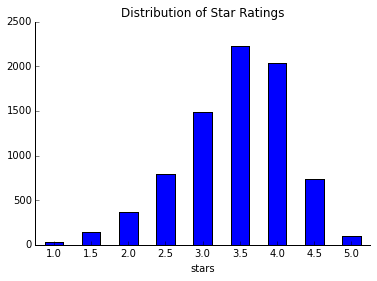

In [6]:
phoenix_df.groupby('stars').stars.count().plot(kind='bar', title='Distribution of Star Ratings', grid=False)
plt.setp(plt.xticks()[1], rotation=0)
remove_border()

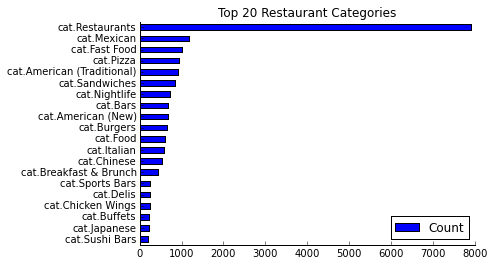

In [73]:
cat = pd.DataFrame(phoenix_df.loc[:, 'cat.Active Life':'cat.Yoga'].sum(), columns=['Count'])
cat = cat[cat['Count']>0]
cat.sort(['Count']).tail(20).plot(kind='barh', title='Top 20 Restaurant Categories', grid=False)
remove_border()